In [1]:
from load_housing_data import *
from split_train_test import *
from sklearn.model_selection import train_test_split
housing = load_housing_data()

In [2]:
train_set1, test_set1 = split_train_test(housing, 0.2)
print(len(train_set1))
print(len(test_set1))

16512
4128


In [3]:
housing_with_id = housing.reset_index() # adds an `index` column
train_set2, test_set2 = split_train_test_by_id(housing_with_id, 0.2, "index")
print(len(train_set2))
print(len(test_set2))

16512
4128


In [4]:
train_set3, test_set3 = train_test_split(housing, test_size=0.2, random_state=42)
print(len(train_set3))
print(len(test_set3))

16512
4128


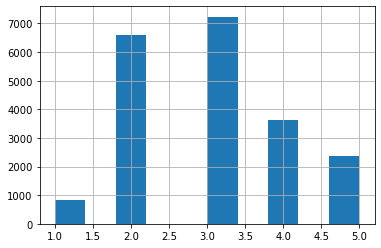

16512
4128


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
housing_strat = stratify_income(housing)
housing_strat["income_cat"].hist()
plt.show()
train_set4, test_set4 = split_train_test_strat(housing_strat, 0.2, remove_cat=True)
print(len(train_set4))
print(len(test_set4))

In [6]:
pd.options.mode.chained_assignment = None
# stratify data
housing_strat = stratify_income(housing)
train_set1_strat = stratify_income(train_set1)
train_set2_strat = stratify_income(train_set2)
train_set3_strat = stratify_income(train_set3)
train_set4_strat = stratify_income(train_set4)
# compute proportions
housing_prop = get_strat_prop(housing_strat)
train_set1_prop = get_strat_prop(train_set1_strat)
train_set2_prop = get_strat_prop(train_set2_strat)
train_set3_prop = get_strat_prop(train_set3_strat)
train_set4_prop = get_strat_prop(train_set4_strat)
prop_table = pd.DataFrame(
    {"housing"     : housing_prop,
     "test_random" : train_set1_prop,
     "test_index"  : train_set2_prop,
     "test_skl"    : train_set3_prop,
     "test_strat"  : train_set4_prop},
    index=range(1,6))
prop_table

,housing,test_random,test_index,test_skl,test_strat
1,0.039826,0.039729,0.041364,0.039729,0.039850
2,0.318847,0.317466,0.315891,0.317466,0.318859
3,0.350581,0.348595,0.351441,0.348595,0.350594
4,0.176308,0.178537,0.178234,0.178537,0.176296
5,0.114438,0.115673,0.113069,0.115673,0.114402


In [7]:
# compute error
train_set1_error = housing_prop-train_set1_prop
train_set2_error = housing_prop-train_set2_prop
train_set3_error = housing_prop-train_set3_prop
train_set4_error = housing_prop-train_set4_prop
error_table = pd.DataFrame(
     {"test_random" : train_set1_error,
      "test_index"  : train_set2_error,
      "test_skl"    : train_set3_error,
      "test_strat"  : train_set4_error},
    index=range(1,6))
error_table

,test_random,test_index,test_skl,test_strat
1,0.000097,-0.001538,0.000097,-0.000024
2,0.001381,0.002955,0.001381,-0.000012
3,0.001986,-0.000860,0.001986,-0.000012
4,-0.002229,-0.001926,-0.002229,0.000012
5,-0.001235,0.001369,-0.001235,0.000036
